In [7]:
%run -i ch03.py

<Figure size 432x288 with 0 Axes>

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X, y = train
X_, y_ = shuffled
X.shape, y.shape

((60000, 784), (60000,))

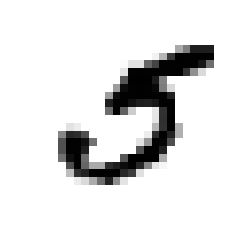

In [9]:
visualize_mnist(train, 36000)

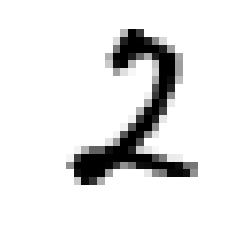

In [10]:
visualize_mnist(shuffled, 36000)

In [11]:
y[36000], y_[36000]

(5, 2)

In [12]:
y_train = (y_ == 5)
y_test = (test[1] == 5)

from sklearn.linear_model import SGDClassifier
from evaluation import EvaluateClassifier as EC

ec = EC(SGDClassifier, max_iter=5, tol=-np.infty, random_state=42)
ec.run(X_, y_train, cv=3)

2019-02-03 20:36:25 ml           INFO     SGDClassifier
2019-02-03 20:36:25 ml           INFO     ==========
2019-02-03 20:36:25 ml           INFO     ('Confusion Matrix:', array([[53928,   651],
       [ 1426,  3995]]))
2019-02-03 20:36:25 ml           INFO     ('P/R', ['0.86', '0.74', '0.86', '0.74'])
2019-02-03 20:36:25 ml           INFO     --------


